In [2]:
import pandas as pd
data = pd.read_csv("202006_01.csv")
data

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender
0,2020-06-01 00:00:03.372,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,1997,2
1,2020-06-01 00:00:03.553,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,1969,0
2,2020-06-01 00:00:09.614,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,1988,2
3,2020-06-01 00:00:12.178,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,1969,0
4,2020-06-01 00:00:21.255,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,1997,2
...,...,...,...,...,...,...,...,...,...,...,...,...
200881,2020-06-05 18:01:51.025,2020-06-05 18:29:17.5890,3295,Central Park W & W 96 St,40.791270,-73.964839,3295,Central Park W & W 96 St,40.791270,-73.964839,1976,1
200882,2020-06-05 18:02:02.256,2020-06-05 19:17:13.4810,3511,Adam Clayton Powell Blvd & W 115 St,40.802535,-73.953242,3314,W 95 St & Broadway,40.793770,-73.971888,1992,1
200883,2020-06-05 18:02:06.603,2020-06-05 18:13:13.8290,3016,Kent Ave & N 7 St,40.720368,-73.961651,3083,Bushwick Ave & Powers St,40.712477,-73.941000,1995,1
200884,2020-06-05 18:02:12.097,2020-06-05 18:13:06.4770,518,E 39 St & 2 Ave,40.747804,-73.973442,450,W 49 St & 8 Ave,40.762272,-73.987882,1997,1


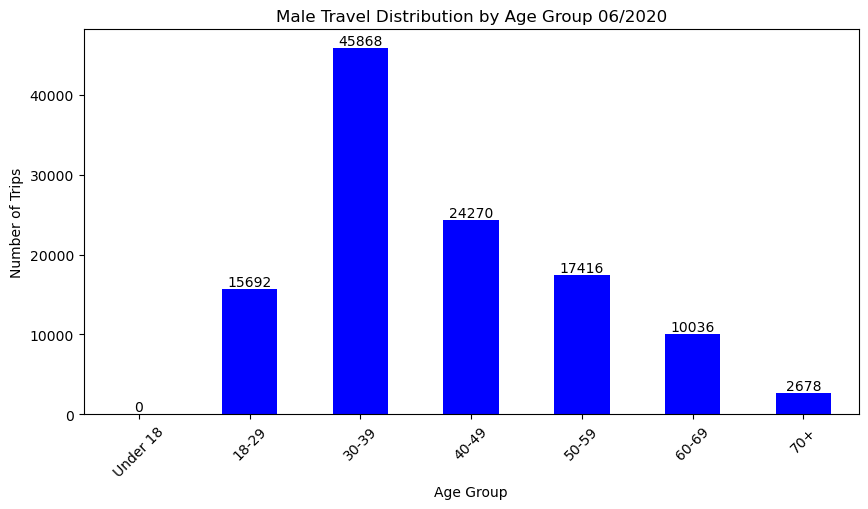

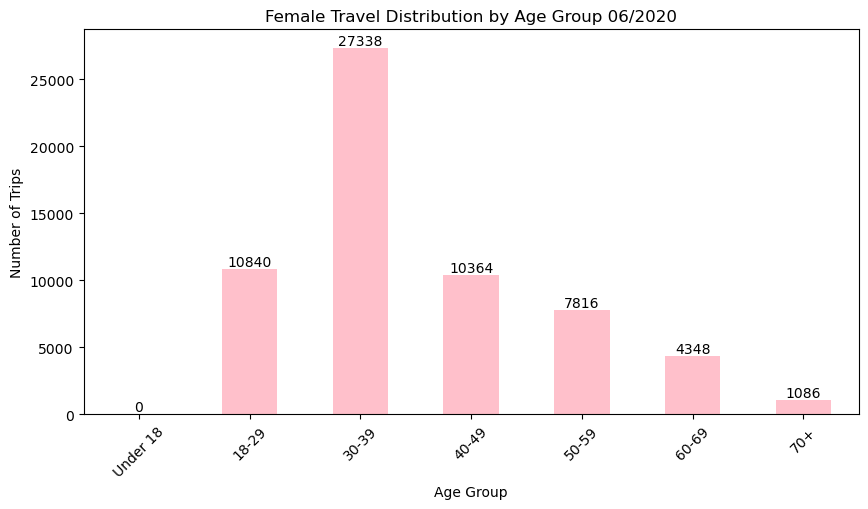

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件到DataFrame
df = pd.read_csv('202006_01.csv')

# 将birth_year列转换为年龄
current_year = 2024  # 假设当前年份为2024
df['age'] = current_year - df['birth_year']

# 定义年龄段
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 仅保留男性和女性数据
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 2]

# 根据性别和年龄段分组并统计
male_age_group_counts = df_male.groupby('age_group').size()
female_age_group_counts = df_female.groupby('age_group').size()

# 绘制男性出行分布图
plt.figure(figsize=(10, 5))
male_age_group_counts.plot(kind='bar', color='blue')
plt.title('Male Travel Distribution by Age Group 06/2020')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(male_age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# 绘制女性出行分布图
plt.figure(figsize=(10, 5))
female_age_group_counts.plot(kind='bar', color='pink')
plt.title('Female Travel Distribution by Age Group 06/2020')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(female_age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [4]:
# 计算男性和女性出行的总数
total_male_trips = male_age_group_counts.sum()
total_female_trips = female_age_group_counts.sum()

# 计算所有出行的总数
total_trips = total_male_trips + total_female_trips

# 计算男性和女性出行占所有出行的百分比
male_percentage = (total_male_trips / total_trips) * 100
female_percentage = (total_female_trips / total_trips) * 100

print("Male trips percentage: {:.2f}%".format(male_percentage))
print("Female trips percentage: {:.2f}%".format(female_percentage))

Male trips percentage: 65.24%
Female trips percentage: 34.76%


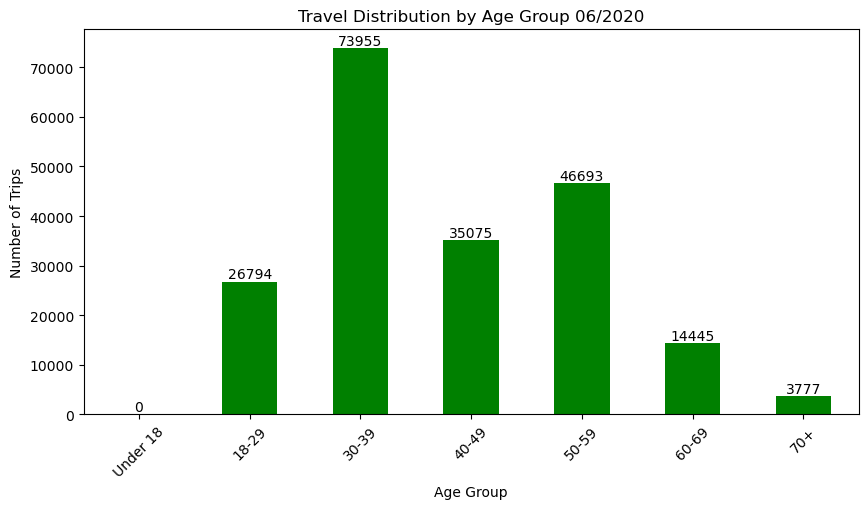

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件到DataFrame
df = pd.read_csv('202006_01.csv')

# 将birth_year列转换为年龄
current_year = 2024  # 假设当前年份为2024
df['age'] = current_year - df['birth_year']

# 定义年龄段
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 根据年龄段分组并统计
age_group_counts = df.groupby('age_group').size()

# 绘制出行分布图
plt.figure(figsize=(10, 5))
age_group_counts.plot(kind='bar', color='green')
plt.title('Travel Distribution by Age Group 06/2020')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [6]:
import pandas as pd
df = pd.read_csv("201906.csv")
df

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,birth year,gender
0,2019-06-03 00:00:09.047,2019-06-03 00:06:20.3650,2005,Railroad Ave & Kay Ave,40.705312,-73.971001,313,Washington Ave & Park Ave,40.696102,-73.967510,2001,1
1,2019-06-03 00:00:10.422,2019-06-03 00:30:40.2220,3686,Gansevoort St & Hudson St,40.739448,-74.005070,3305,E 91 St & 2 Ave,40.781122,-73.949656,1981,1
2,2019-06-03 00:00:24.343,2019-06-03 00:13:44.6580,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,3241,Monroe St & Tompkins Ave,40.686203,-73.944694,1985,2
3,2019-06-03 00:00:27.823,2019-06-03 00:24:22.6560,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3042,Fulton St & Utica Ave,40.679427,-73.929891,1982,1
4,2019-06-03 00:00:31.499,2019-06-03 00:22:32.5270,411,E 6 St & Avenue D,40.722281,-73.976687,411,E 6 St & Avenue D,40.722281,-73.976687,1999,1
...,...,...,...,...,...,...,...,...,...,...,...,...
404099,2019-06-07 23:59:52.095,2019-06-08 00:42:22.5210,486,Broadway & W 29 St,40.746201,-73.988557,3126,44 Dr & Jackson Ave,40.747182,-73.943264,1998,1
404100,2019-06-07 23:59:54.331,2019-06-08 00:20:40.4930,546,E 30 St & Park Ave S,40.744449,-73.983035,3164,Columbus Ave & W 72 St,40.777057,-73.978985,1982,1
404101,2019-06-07 23:59:54.889,2019-06-08 00:24:12.9940,3555,28 St & 41 Ave,40.751047,-73.937970,3131,E 68 St & 3 Ave,40.767128,-73.962246,1997,1
404102,2019-06-07 23:59:55.147,2019-06-08 01:05:06.9560,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,1969,0


In [7]:
new_columns = ['starttime', 'stoptime','start_station_id','start_station_name',
               'start_station_latitude','start_station_longitude','end_station_id',
               'end_station_name','end_station_latitude','end_station_longitude',
               'birth_year','gender']
df.columns = new_columns
df.to_csv('201906_01.csv', index=False)
df

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender
0,2019-06-03 00:00:09.047,2019-06-03 00:06:20.3650,2005,Railroad Ave & Kay Ave,40.705312,-73.971001,313,Washington Ave & Park Ave,40.696102,-73.967510,2001,1
1,2019-06-03 00:00:10.422,2019-06-03 00:30:40.2220,3686,Gansevoort St & Hudson St,40.739448,-74.005070,3305,E 91 St & 2 Ave,40.781122,-73.949656,1981,1
2,2019-06-03 00:00:24.343,2019-06-03 00:13:44.6580,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,3241,Monroe St & Tompkins Ave,40.686203,-73.944694,1985,2
3,2019-06-03 00:00:27.823,2019-06-03 00:24:22.6560,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3042,Fulton St & Utica Ave,40.679427,-73.929891,1982,1
4,2019-06-03 00:00:31.499,2019-06-03 00:22:32.5270,411,E 6 St & Avenue D,40.722281,-73.976687,411,E 6 St & Avenue D,40.722281,-73.976687,1999,1
...,...,...,...,...,...,...,...,...,...,...,...,...
404099,2019-06-07 23:59:52.095,2019-06-08 00:42:22.5210,486,Broadway & W 29 St,40.746201,-73.988557,3126,44 Dr & Jackson Ave,40.747182,-73.943264,1998,1
404100,2019-06-07 23:59:54.331,2019-06-08 00:20:40.4930,546,E 30 St & Park Ave S,40.744449,-73.983035,3164,Columbus Ave & W 72 St,40.777057,-73.978985,1982,1
404101,2019-06-07 23:59:54.889,2019-06-08 00:24:12.9940,3555,28 St & 41 Ave,40.751047,-73.937970,3131,E 68 St & 3 Ave,40.767128,-73.962246,1997,1
404102,2019-06-07 23:59:55.147,2019-06-08 01:05:06.9560,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,1969,0


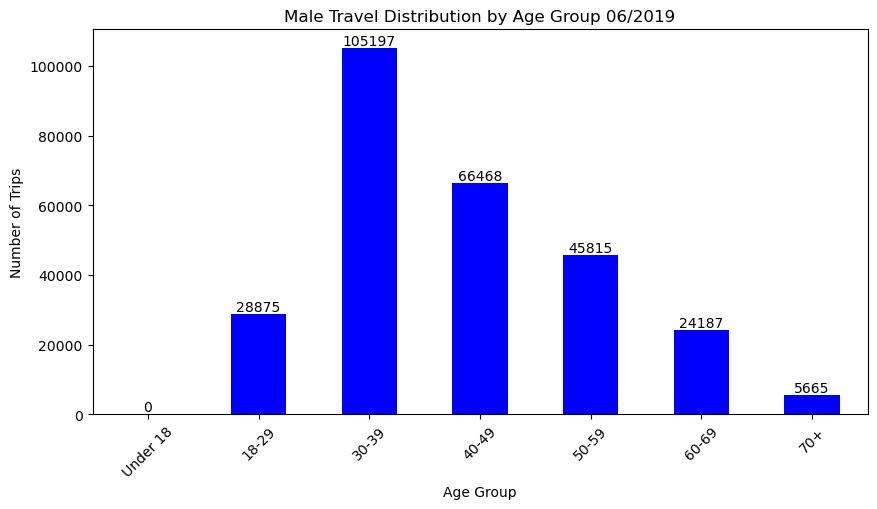

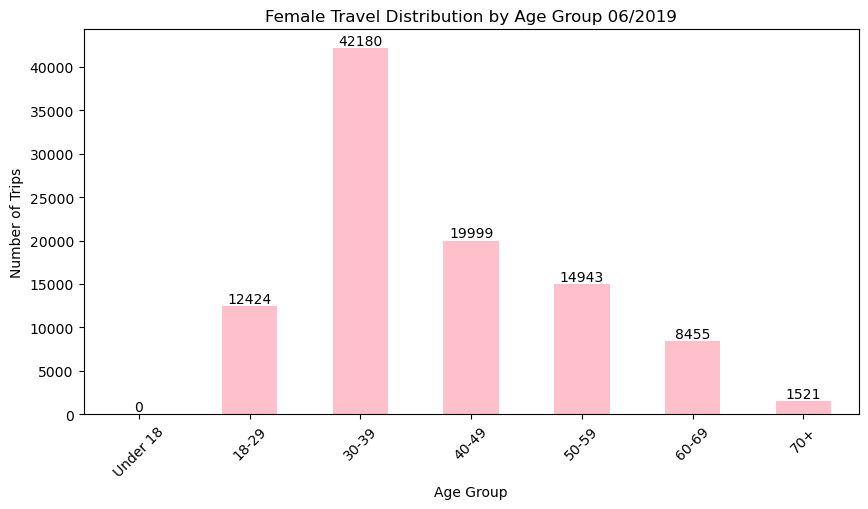

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件到DataFrame
df = pd.read_csv('201906_01.csv')

# 将birth_year列转换为年龄
current_year = 2024  # 假设当前年份为2024
df['age'] = current_year - df['birth_year']

# 定义年龄段
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 仅保留男性和女性数据
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 2]

# 根据性别和年龄段分组并统计
male_age_group_counts = df_male.groupby('age_group').size()
female_age_group_counts = df_female.groupby('age_group').size()

# 绘制男性出行分布图
plt.figure(figsize=(10, 5))
male_age_group_counts.plot(kind='bar', color='blue')
plt.title('Male Travel Distribution by Age Group 06/2019')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(male_age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# 绘制女性出行分布图
plt.figure(figsize=(10, 5))
female_age_group_counts.plot(kind='bar', color='pink')
plt.title('Female Travel Distribution by Age Group 06/2019')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(female_age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [9]:
# 计算男性和女性出行的总数
total_male_trips = male_age_group_counts.sum()
total_female_trips = female_age_group_counts.sum()

# 计算所有出行的总数
total_trips = total_male_trips + total_female_trips

# 计算男性和女性出行占所有出行的百分比
male_percentage = (total_male_trips / total_trips) * 100
female_percentage = (total_female_trips / total_trips) * 100

print("Male trips percentage: {:.2f}%".format(male_percentage))
print("Female trips percentage: {:.2f}%".format(female_percentage))

Male trips percentage: 73.51%
Female trips percentage: 26.49%


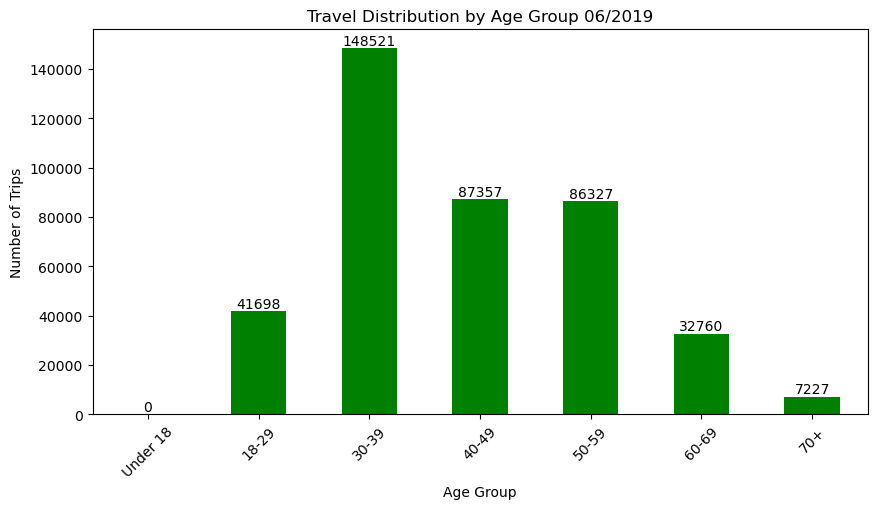

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件到DataFrame
df = pd.read_csv('201906_01.csv')

# 将birth_year列转换为年龄
current_year = 2024  # 假设当前年份为2024
df['age'] = current_year - df['birth_year']

# 定义年龄段
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 根据年龄段分组并统计
age_group_counts = df.groupby('age_group').size()

# 绘制出行分布图
plt.figure(figsize=(10, 5))
age_group_counts.plot(kind='bar', color='green')
plt.title('Travel Distribution by Age Group 06/2019')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# 在柱状图上标注具体数值
for i, v in enumerate(age_group_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [35]:
df = pd.read_csv('202006_visiluazation.csv')
df

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender,ride_duration
0,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,1997,2,18
1,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,1969,0,64
2,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,1988,2,17
3,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,1969,0,4
4,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,1997,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200881,2020-06-05 18:01:51.025,2020-06-05 18:29:17.589,3295,Central Park W & W 96 St,40.791270,-73.964839,3295,Central Park W & W 96 St,40.791270,-73.964839,1976,1,27
200882,2020-06-05 18:02:02.256,2020-06-05 19:17:13.481,3511,Adam Clayton Powell Blvd & W 115 St,40.802535,-73.953242,3314,W 95 St & Broadway,40.793770,-73.971888,1992,1,75
200883,2020-06-05 18:02:06.603,2020-06-05 18:13:13.829,3016,Kent Ave & N 7 St,40.720368,-73.961651,3083,Bushwick Ave & Powers St,40.712477,-73.941000,1995,1,11
200884,2020-06-05 18:02:12.097,2020-06-05 18:13:06.477,518,E 39 St & 2 Ave,40.747804,-73.973442,450,W 49 St & 8 Ave,40.762272,-73.987882,1997,1,11


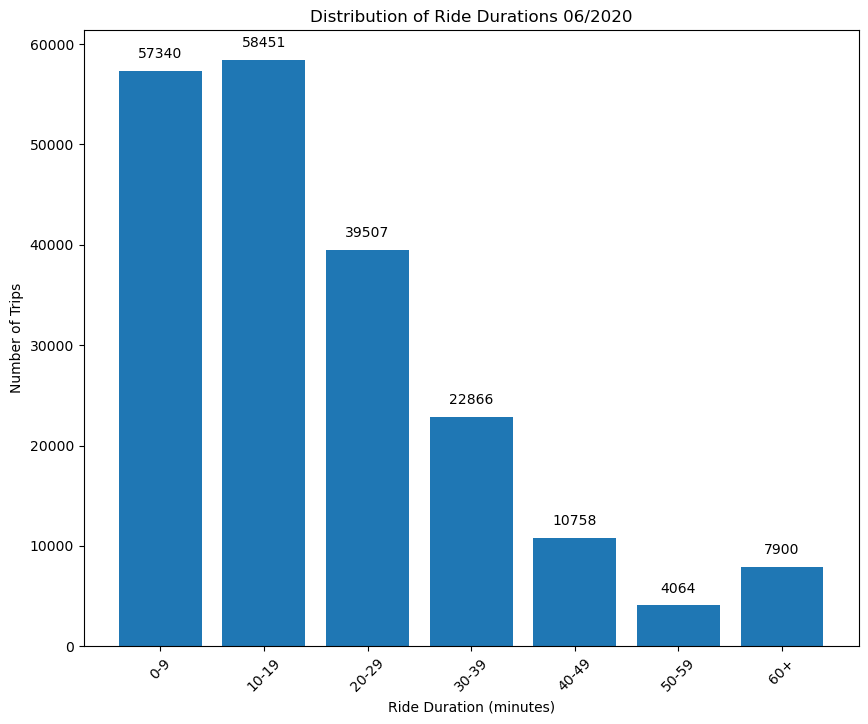

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv("202006_visiluazation.csv")

# 分组ride_duration并计数
bins = list(range(0, 70, 10)) + [float('inf')]
labels = [f"{i}-{i+9}" for i in range(0, 60, 10)] + ["60+"]
df['duration_group'] = pd.cut(df['ride_duration'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('duration_group').size()

# 绘制柱状图
plt.figure(figsize=(10, 8))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Ride Durations 06/2020')

# 在柱状图上标注具体数值
for i, v in enumerate(grouped_data.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [63]:
# 读取CSV文件到DataFrame
df = pd.read_csv('201906_01.csv')

# 将starttime和stoptime列转换为datetime类型
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# 计算骑行持续时间（单位：分钟）并存储到新列
df['ride_duration'] = ((df['stoptime'] - df['starttime']).dt.total_seconds() / 60).round().astype(int)
# 保存DataFrame到新的CSV文件
df.to_csv('201906_visiluazation.csv', index=False)
df

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender,ride_duration
0,2019-06-03 00:00:09.047,2019-06-03 00:06:20.365,2005,Railroad Ave & Kay Ave,40.705312,-73.971001,313,Washington Ave & Park Ave,40.696102,-73.967510,2001,1,6
1,2019-06-03 00:00:10.422,2019-06-03 00:30:40.222,3686,Gansevoort St & Hudson St,40.739448,-74.005070,3305,E 91 St & 2 Ave,40.781122,-73.949656,1981,1,30
2,2019-06-03 00:00:24.343,2019-06-03 00:13:44.658,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,3241,Monroe St & Tompkins Ave,40.686203,-73.944694,1985,2,13
3,2019-06-03 00:00:27.823,2019-06-03 00:24:22.656,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,3042,Fulton St & Utica Ave,40.679427,-73.929891,1982,1,24
4,2019-06-03 00:00:31.499,2019-06-03 00:22:32.527,411,E 6 St & Avenue D,40.722281,-73.976687,411,E 6 St & Avenue D,40.722281,-73.976687,1999,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404099,2019-06-07 23:59:52.095,2019-06-08 00:42:22.521,486,Broadway & W 29 St,40.746201,-73.988557,3126,44 Dr & Jackson Ave,40.747182,-73.943264,1998,1,43
404100,2019-06-07 23:59:54.331,2019-06-08 00:20:40.493,546,E 30 St & Park Ave S,40.744449,-73.983035,3164,Columbus Ave & W 72 St,40.777057,-73.978985,1982,1,21
404101,2019-06-07 23:59:54.889,2019-06-08 00:24:12.994,3555,28 St & 41 Ave,40.751047,-73.937970,3131,E 68 St & 3 Ave,40.767128,-73.962246,1997,1,24
404102,2019-06-07 23:59:55.147,2019-06-08 01:05:06.956,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,3554,Vernon Blvd & 41 Rd,40.755243,-73.948568,1969,0,65


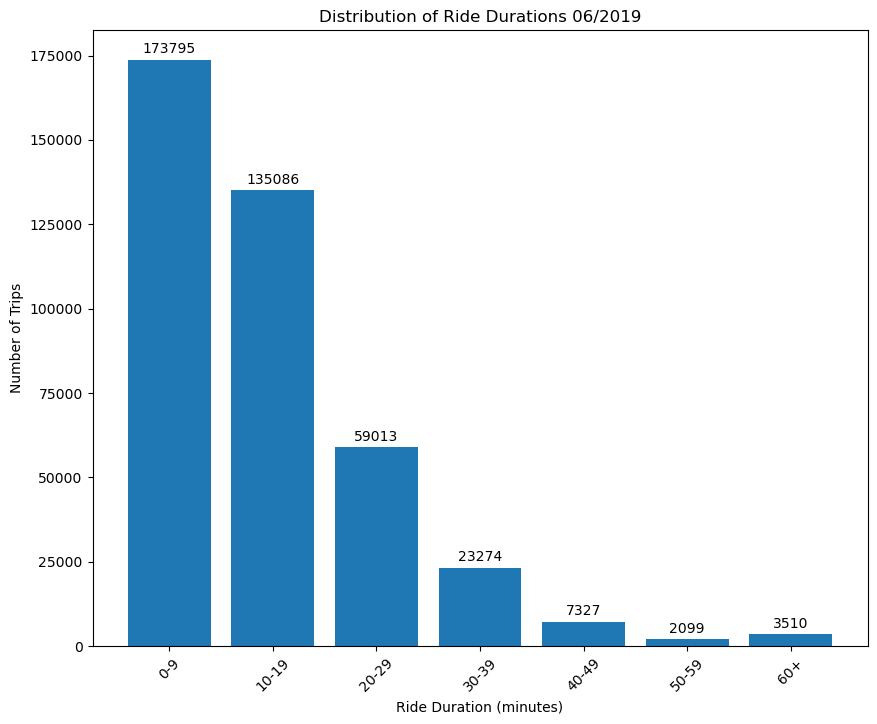

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv("201906_visiluazation.csv")

# 分组ride_duration并计数
bins = list(range(0, 70, 10)) + [float('inf')]
labels = [f"{i}-{i+9}" for i in range(0, 60, 10)] + ["60+"]
df['duration_group'] = pd.cut(df['ride_duration'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('duration_group').size()

# 绘制柱状图
plt.figure(figsize=(10, 8))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Ride Durations 06/2019')

# 在柱状图上标注具体数值
for i, v in enumerate(grouped_data.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

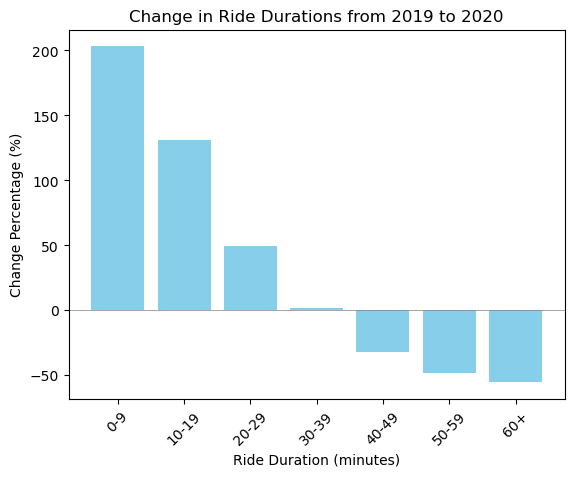

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取2019年和2020年的数据
df_2019 = pd.read_csv("201906_visiluazation.csv")
df_2020 = pd.read_csv("202006_visiluazation.csv")

# 分组ride_duration并计算平均值
bins = list(range(0, 70, 10)) + [float('inf')]
labels = [f"{i}-{i+9}" for i in range(0, 60, 10)] + ["60+"]
df_2019['duration_group'] = pd.cut(df_2019['ride_duration'], bins=bins, labels=labels, right=False)
df_2020['duration_group'] = pd.cut(df_2020['ride_duration'], bins=bins, labels=labels, right=False)
grouped_data_2019 = df_2019.groupby('duration_group').size()
grouped_data_2020 = df_2020.groupby('duration_group').size()

# 计算变化百分比
change_percentage = ((grouped_data_2019 - grouped_data_2020) / grouped_data_2020) * 100

# 绘制变化百分比柱状图
plt.bar(change_percentage.index, change_percentage.values, color='skyblue')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Change Percentage (%)')
plt.title('Change in Ride Durations from 2019 to 2020')
plt.axhline(0, color='gray', linewidth=0.5)  # 添加水平参考线
plt.xticks(rotation=45)
plt.show()

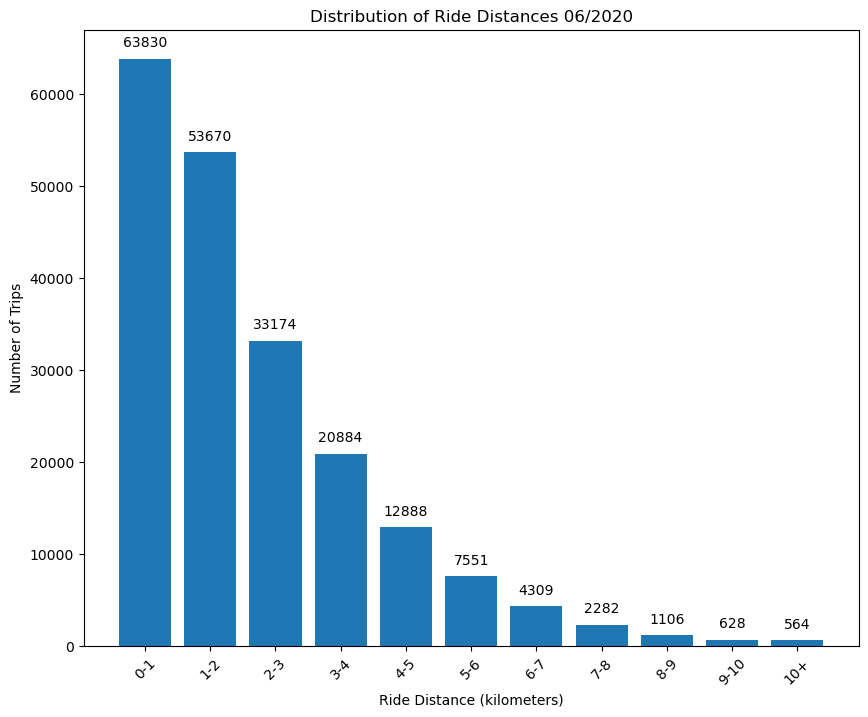

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 读取CSV文件
df = pd.read_csv("202006_visiluazation.csv")

# 计算骑行距离
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    return geodesic(start_coords, end_coords).kilometers

df['ride_distance'] = df.apply(calculate_distance, axis=1)

# 分组ride_distance并计数
bins = list(range(0, 11)) + [float('inf')]
labels = [f"{i}-{i+1}" for i in range(0, 10)] + ["10+"]
df['distance_group'] = pd.cut(df['ride_distance'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('distance_group').size()

# 绘制柱状图
plt.figure(figsize=(10, 8))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Ride Distance (kilometers)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Ride Distances 06/2020')
for i, v in enumerate(grouped_data.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

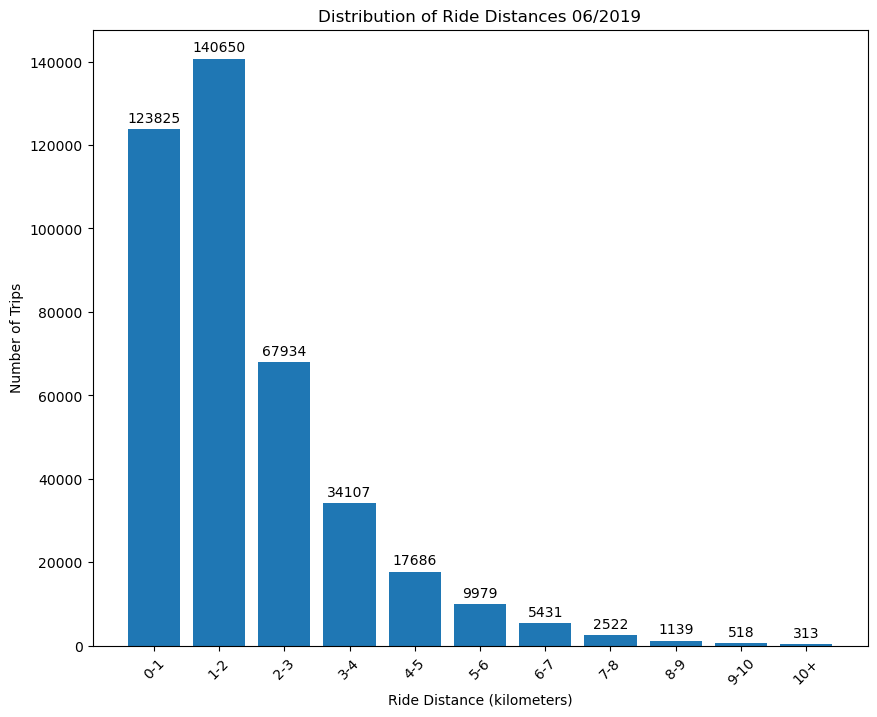

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 读取CSV文件
df = pd.read_csv("201906_visiluazation.csv")

# 计算骑行距离
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    return geodesic(start_coords, end_coords).kilometers

df['ride_distance'] = df.apply(calculate_distance, axis=1)

# 分组ride_distance并计数
bins = list(range(0, 11)) + [float('inf')]
labels = [f"{i}-{i+1}" for i in range(0, 10)] + ["10+"]
df['distance_group'] = pd.cut(df['ride_distance'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('distance_group').size()

# 绘制柱状图
plt.figure(figsize=(10, 8))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Ride Distance (kilometers)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Ride Distances 06/2019')
for i, v in enumerate(grouped_data.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

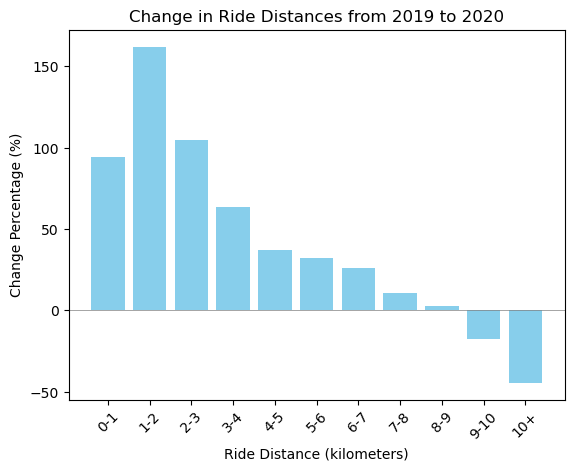

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取2019年和2020年的数据
df_2019 = pd.read_csv("201906_visiluazation.csv")
df_2020 = pd.read_csv("202006_visiluazation.csv")

# 计算骑行距离
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    return geodesic(start_coords, end_coords).kilometers

df_2019['ride_distance'] = df_2019.apply(calculate_distance, axis=1)
df_2020['ride_distance'] = df_2020.apply(calculate_distance, axis=1)

# 分组ride_distance并计算平均值
bins = list(range(0, 11)) + [float('inf')]
labels = [f"{i}-{i+1}" for i in range(0, 10)] + ["10+"]
df_2019['distance_group'] = pd.cut(df_2019['ride_distance'], bins=bins, labels=labels, right=False)
df_2020['distance_group'] = pd.cut(df_2020['ride_distance'], bins=bins, labels=labels, right=False)
grouped_data_2019 = df_2019.groupby('distance_group').size()
grouped_data_2020 = df_2020.groupby('distance_group').size()

# 计算变化百分比
change_percentage = ((grouped_data_2019 - grouped_data_2020) / grouped_data_2020) * 100

# 绘制变化百分比柱状图
plt.bar(change_percentage.index, change_percentage.values, color='skyblue')
plt.xlabel('Ride Distance (kilometers)')
plt.ylabel('Change Percentage (%)')
plt.title('Change in Ride Distances from 2019 to 2020')
plt.axhline(0, color='gray', linewidth=0.5)  # 添加水平参考线
plt.xticks(rotation=45)
plt.show()